In [27]:
!pip install FlowCal


In [28]:
!pip install joypy


In [29]:
import FlowCal
import matplotlib.pyplot as plt
import numpy as np


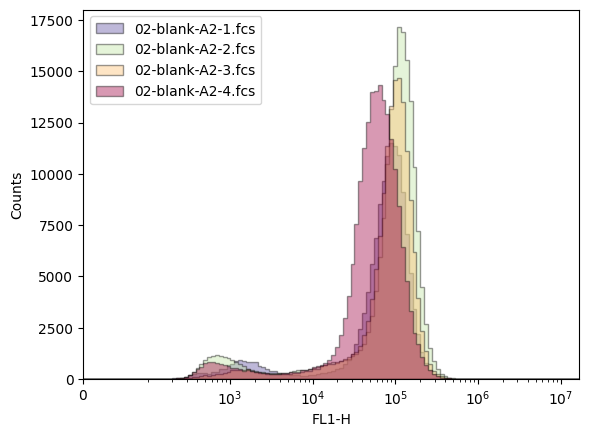

In [30]:
filenames = ['02-blank-A2-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.4, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("ticks", {'axes.grid': True})
g = sns.displot(data=df, ax= ax, height= 2, aspect=4)
ax.set_ylim(0, 2000)
ax.set_xlim(0, 1000000)
plt.show()


NameError: name 'ax' is not defined

In [31]:
d1 = FlowCal.io.FCSData('02-blank-A2-1.fcs')

d1_fl1 = d1[:, ['FL1-H']]
d1_list = d1_fl1.tolist()

d2 = FlowCal.io.FCSData('02-blank-A2-2.fcs')

d2_fl1 = d2[:, ['FL1-H']]
d2_list = d2_fl1.tolist()

d3 = FlowCal.io.FCSData('02-blank-A2-3.fcs')

d3_fl1 = d3[:, ['FL1-H']]
d3_list = d3_fl1.tolist()

d4 = FlowCal.io.FCSData('02-blank-A2-4.fcs')

d4_fl1 = d4[:, ['FL1-H']]
d4_list = d4_fl1.tolist()

import pandas as pd

df1 = pd.DataFrame(d1_list)
df2 = pd.DataFrame(d2_list)
df3 = pd.DataFrame(d3_list)
df4 = pd.DataFrame(d4_list)

df = pd.concat([df1, df2, df3, df4], axis=1)
df.columns= ['No IPTG + no aTc', 'IPTG', 'aTc', 'IPTG + aTc']
df


,No IPTG + no aTc,IPTG,aTc,IPTG + aTc
0,558.900024,118833.703125,364.700012,16375.799805
1,407.299988,118943.601562,358.100006,96679.101562
2,431.899994,87353.796875,315.000000,68153.296875
3,337.399994,100892.000000,351.299988,31386.599609
4,179.199997,68235.898438,503.299988,35502.199219
...,...,...,...,...
197690,NaN,NaN,NaN,62866.000000
197691,NaN,NaN,NaN,675.099976
197692,NaN,NaN,NaN,78127.101562
197693,NaN,NaN,NaN,50111.800781


In [32]:
drop_indices = np.random.choice(df2.index, 55000, replace=False)
df2_new = df2.drop(drop_indices)

drop_indices = np.random.choice(df3.index, 25000, replace=False)
df3_new = df3.drop(drop_indices)

drop_indices = np.random.choice(df4.index, 25000, replace=False)
df4_new = df4.drop(drop_indices)


In [33]:
df = pd.concat([df1, df2_new, df3_new, df4_new], axis=1)
df.columns= ['No IPTG + no aTc', 'IPTG', 'aTc', 'IPTG + aTc']
df


,No IPTG + no aTc,IPTG,aTc,IPTG + aTc
0,558.900024,NaN,364.700012,16375.799805
1,407.299988,118943.601562,358.100006,96679.101562
2,431.899994,87353.796875,315.000000,68153.296875
3,337.399994,100892.000000,351.299988,31386.599609
4,179.199997,68235.898438,503.299988,35502.199219
...,...,...,...,...
197689,NaN,NaN,NaN,32908.000000
197690,NaN,NaN,NaN,62866.000000
197691,NaN,NaN,NaN,675.099976
197692,NaN,NaN,NaN,78127.101562


In [34]:
log_df = df.apply(np.log10)


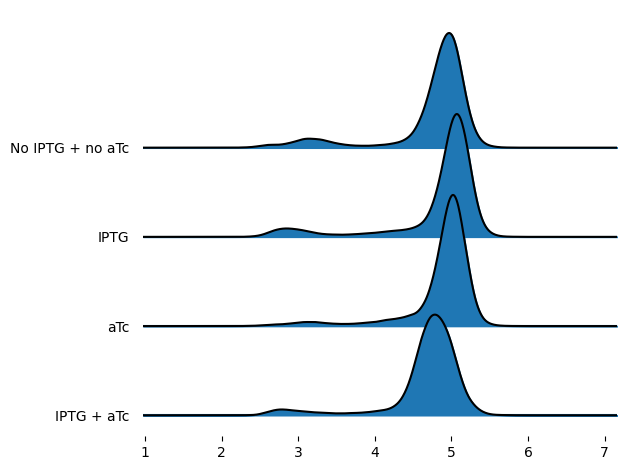

In [35]:
import joypy
import numpy as np

fig, axes = joypy.joyplot(log_df)


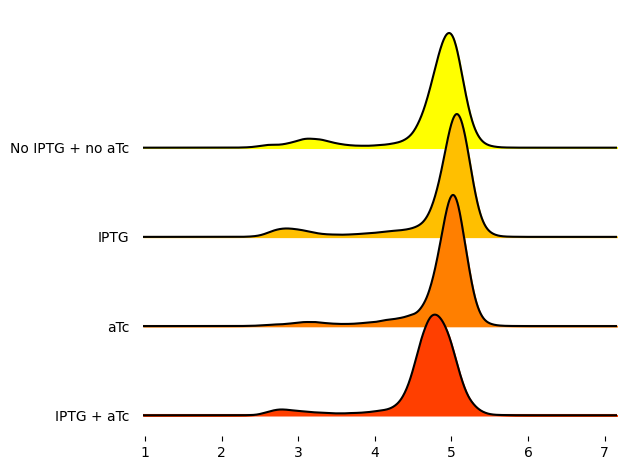

In [36]:
fig, axes = joypy.joyplot(log_df, colormap=plt.cm.autumn_r)


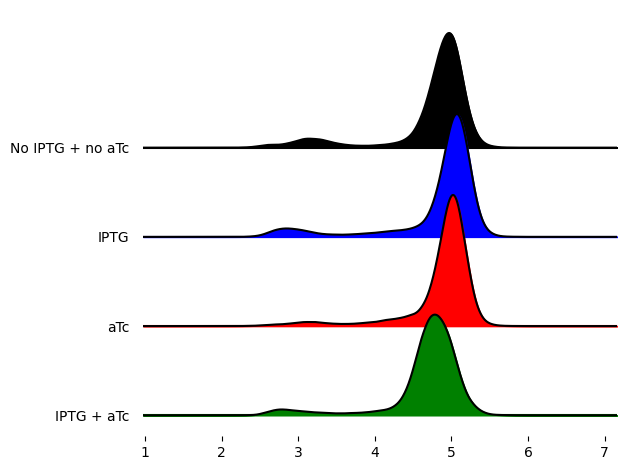

In [37]:
fig, axes = joypy.joyplot(log_df, color=["k","b","r","g"])


ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 4 colors were provided

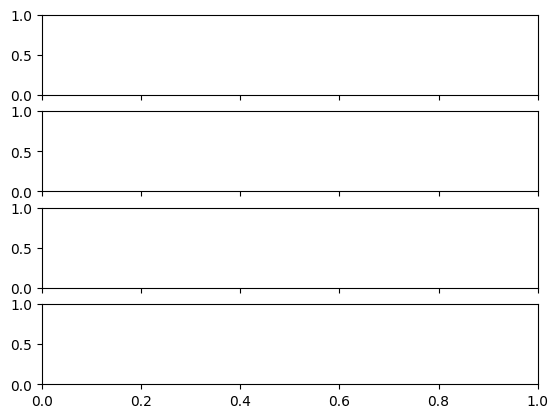

In [38]:
fig, axes = joypy.joyplot(log_df, hist= True, color= ["k","b","r","g"])


ValueError: RGBA sequence should have length 3 or 4

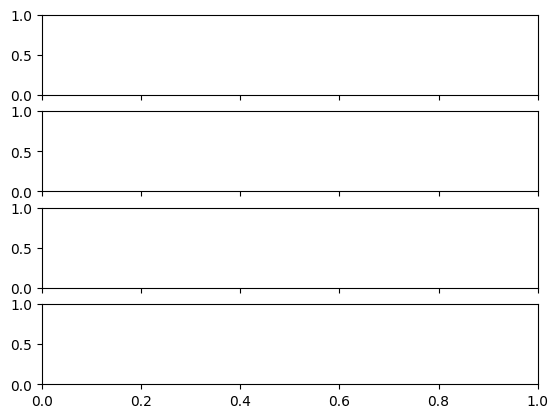

In [39]:
fig, axes = joypy.joyplot(log_df, hist= True, color=[["k"], ["b"], ["r"], ["g"]])


ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 4 colors were provided

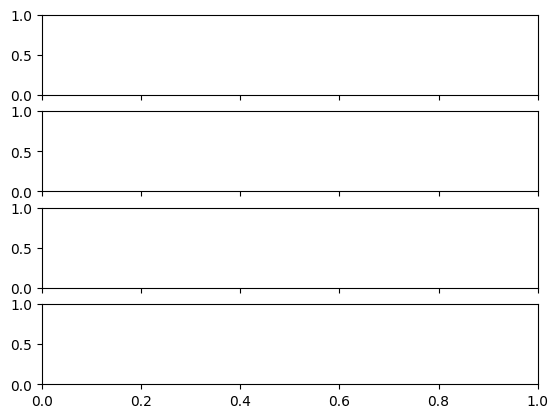

In [42]:
fig, axes = joypy.joyplot(log_df, hist= True, color=[[0,0,0],[0,0,255],[255,0,0],[0,255,0]])


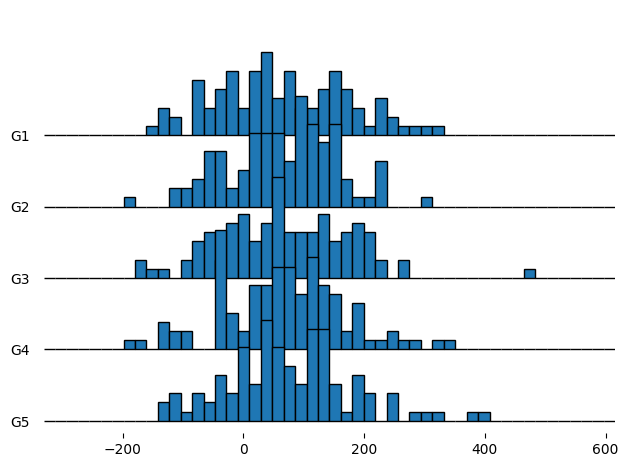

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np; np.random.seed(2)
import random; random.seed(2)
import joypy

# Sample data
df = pd.DataFrame({'var1': np.random.normal(70, 100, 500),
                   'var2': np.random.normal(250, 100, 500),
                   'group': random.choices(["G1", "G2", "G3", "G4", "G5"], k = 500)})

fig, ax = joypy.joyplot(df, by = "group", column = "var1",
                        hist = True, bins = 50)

plt.show()


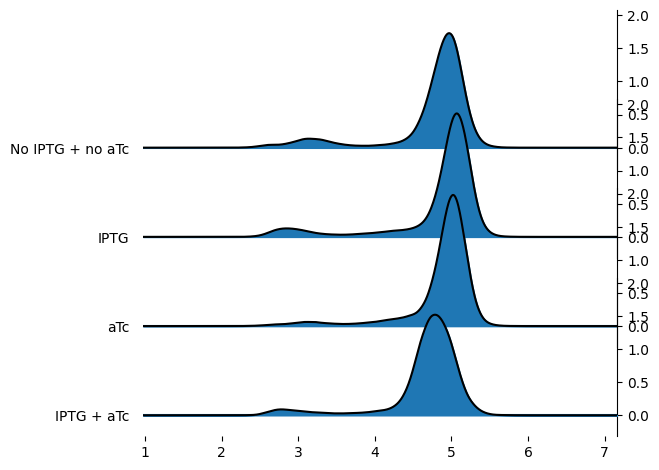

In [ ]:
import joypy

fig, axes = joypy.joyplot(log_df)

for ax in axes[:-1]:  # last axis is just for global settings
    ax.secondary_yaxis('right', functions= (lambda x:x, lambda x:x))


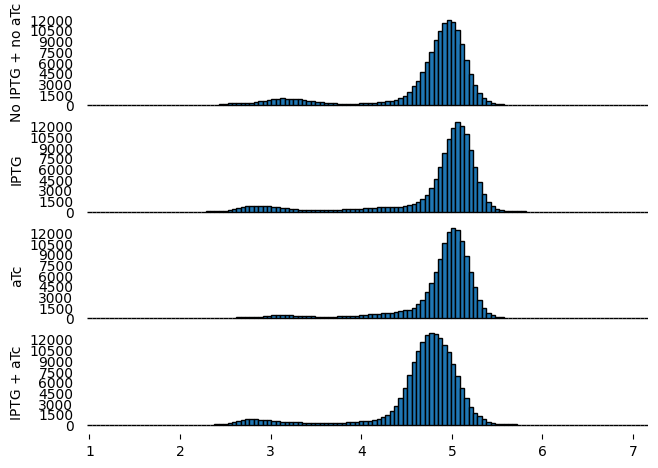

In [14]:
import joypy
from matplotlib.ticker import MaxNLocator, ScalarFormatter

fig, axes = joypy.joyplot(log_df, fill= True, hist= True, bins=128, overlap = 0)

for ax in axes[:-1]:
    ax.set_ylabel(ax.get_yticklabels()[0].get_text())
    ax.yaxis.set_major_locator(MaxNLocator())
    ax.yaxis.set_major_formatter(ScalarFormatter())
fig.subplots_adjust(left=0.1)


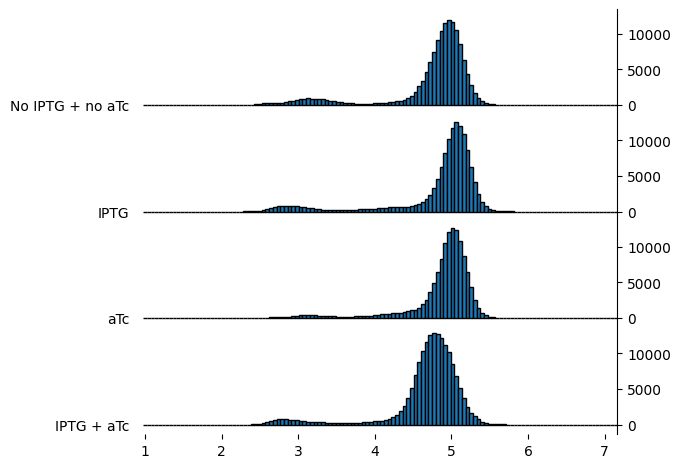

In [17]:
import joypy

fig, axes = joypy.joyplot(log_df, fill= True, hist= True, bins=128, overlap = 0)

for ax in axes[:-1]:  # last axis is just for global settings
    ax.secondary_yaxis('right', functions= (lambda x:x, lambda x:x))


In [19]:
log_df['No IPTG + no aTc']

0         2.747334
1         2.609914
2         2.635383
3         2.528145
4         2.253338
            ...   
197690         NaN
197691         NaN
197692         NaN
197693         NaN
197694         NaN
Name: No IPTG + no aTc, Length: 194829, dtype: float64

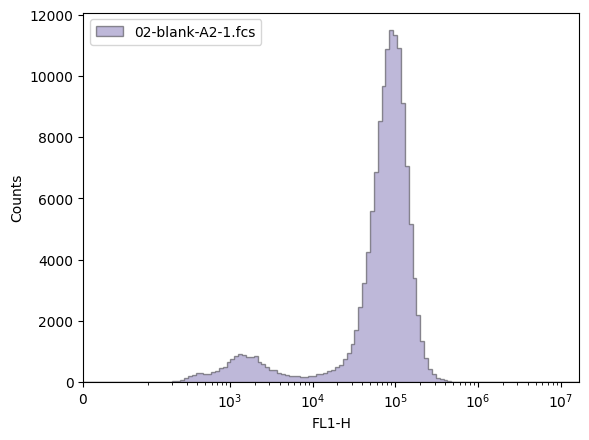

In [ ]:
filenames = ['02-blank-A2-1.fcs']
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.4, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


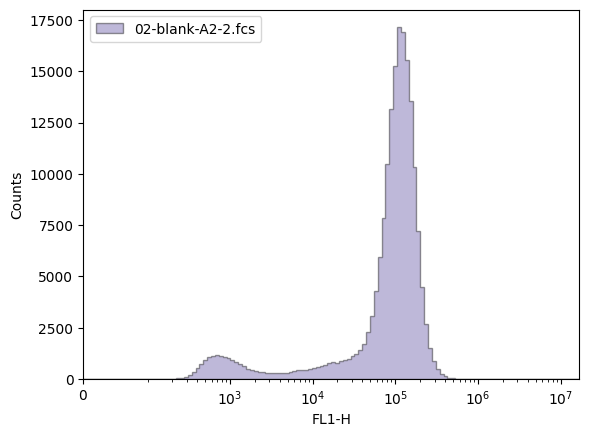

In [ ]:
filenames = ['02-blank-A2-2.fcs']
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.4, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


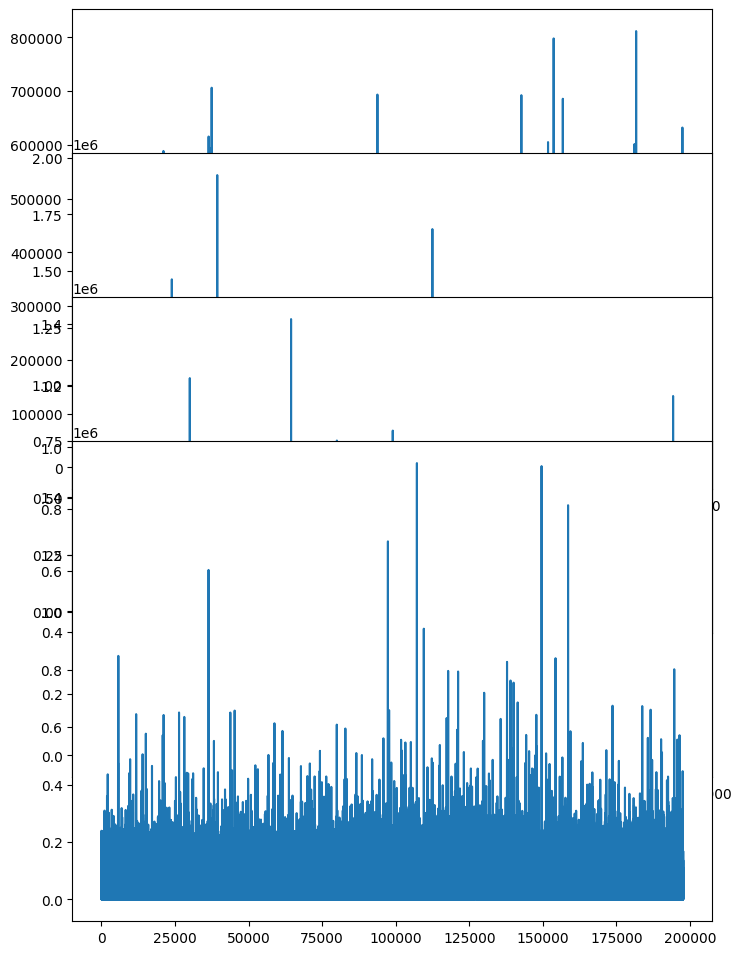

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plots = [d1_list, d2_list, d3_list, d4_list]
fig = plt.figure()

#Sets the default vertical position
pos = 0

def making_plot(ax, p):
    ax.plot(p)

for p in plots:
    ax = fig.add_axes([1,pos,1,1])
    pos -= 0.3
    making_plot(ax, p)
plt.show()


In [ ]:
zorder = 0
for i, Y in enumerate(d):
  baseline = min(Y)
  #change needed for minimum of Y to be delta_Y above previous curve
  y_change = delta_Y * i - baseline
  Y = Y + y_change
  FlowCal.plot.hist1d(di, Y, delta_Y * i, zorder = zorder)
  zorder -= 1


ValueError: ignored

In [ ]:
plt.fill_between(d, Y, np.ones(1000) * delta_Y * i, zorder = zorder)

array([   0.        ,    1.001001  ,    2.002002  ,    3.003003  ,
          4.004004  ,    5.00500501,    6.00600601,    7.00700701,
          8.00800801,    9.00900901,   10.01001001,   11.01101101,
         12.01201201,   13.01301301,   14.01401401,   15.01501502,
         16.01601602,   17.01701702,   18.01801802,   19.01901902,
         20.02002002,   21.02102102,   22.02202202,   23.02302302,
         24.02402402,   25.02502503,   26.02602603,   27.02702703,
         28.02802803,   29.02902903,   30.03003003,   31.03103103,
         32.03203203,   33.03303303,   34.03403403,   35.03503504,
         36.03603604,   37.03703704,   38.03803804,   39.03903904,
         40.04004004,   41.04104104,   42.04204204,   43.04304304,
         44.04404404,   45.04504505,   46.04604605,   47.04704705,
         48.04804805,   49.04904905,   50.05005005,   51.05105105,
         52.05205205,   53.05305305,   54.05405405,   55.05505506,
         56.05605606,   57.05705706,   58.05805806,   59.05905

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



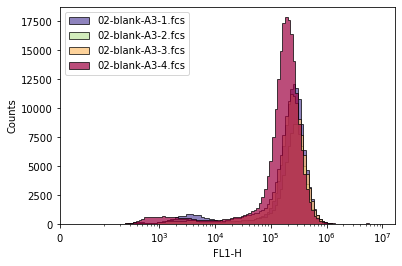

In [ ]:
filenames = ['02-blank-A3-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
#d = [FlowCal.transform.to_rfi(di) for di in d]
print(d)
print(type(d[0]))
print(d[0])
print(dir(d[0]))
print(d[0].tolist())
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


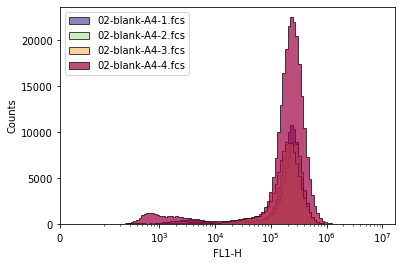

In [ ]:
filenames = ['02-blank-A4-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


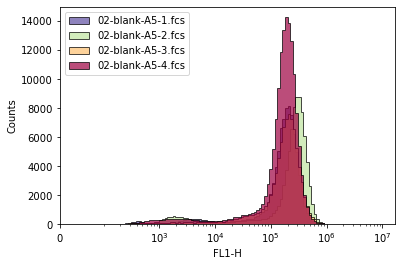

In [ ]:
filenames = ['02-blank-A5-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


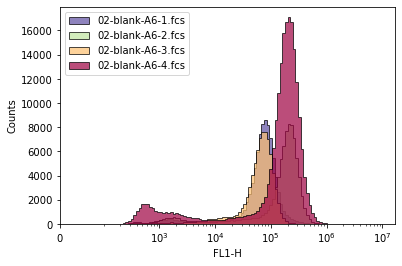

In [ ]:
filenames = ['02-blank-A6-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


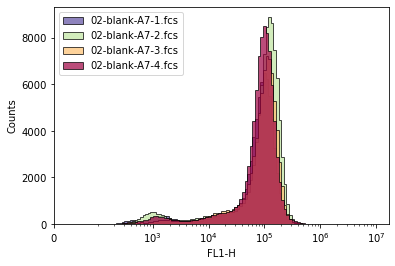

In [ ]:
filenames = ['02-blank-A7-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


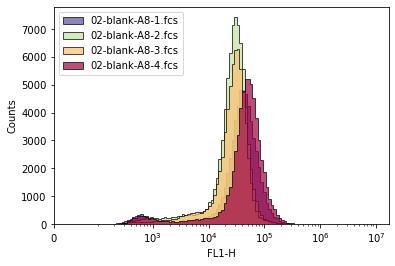

In [ ]:
filenames = ['02-blank-A8-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


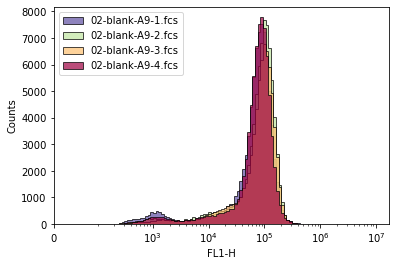

In [ ]:
filenames = ['02-blank-A9-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


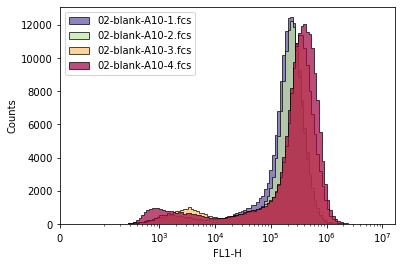

In [ ]:
filenames = ['02-blank-A10-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


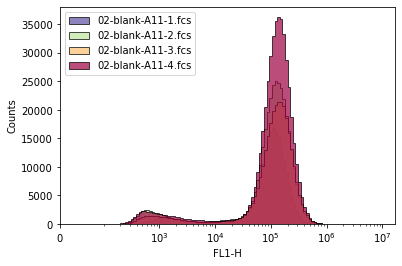

In [ ]:
filenames = ['02-blank-A11-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


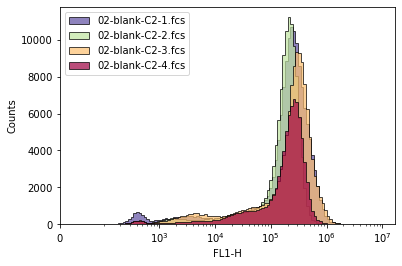

In [ ]:
filenames = ['02-blank-C2-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


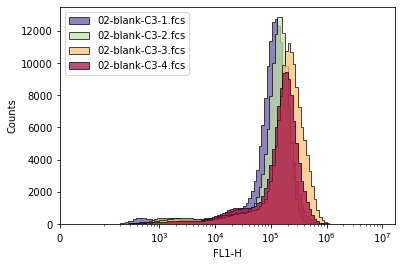

In [ ]:
filenames = ['02-blank-C3-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


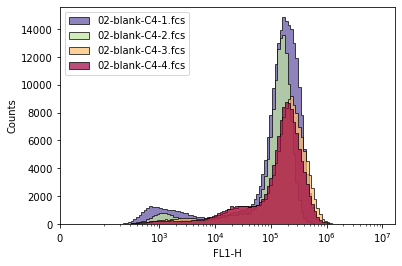

In [ ]:
filenames = ['02-blank-C4-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


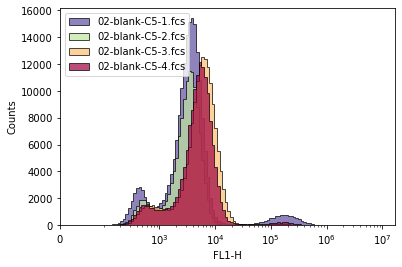

In [ ]:
filenames = ['02-blank-C5-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


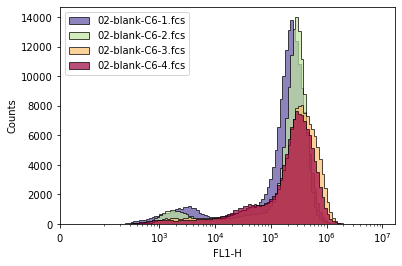

In [ ]:
filenames = ['02-blank-C6-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


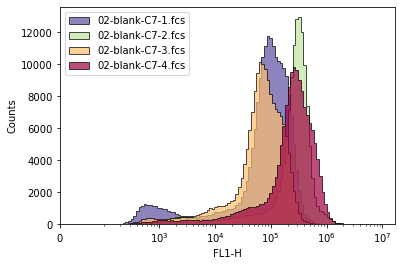

In [ ]:
filenames = ['02-blank-C7-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


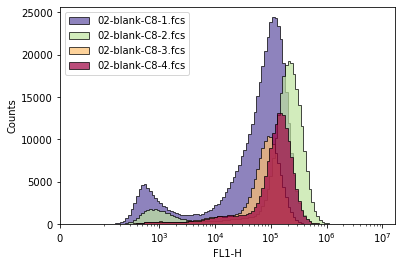

In [ ]:
filenames = ['02-blank-C8-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


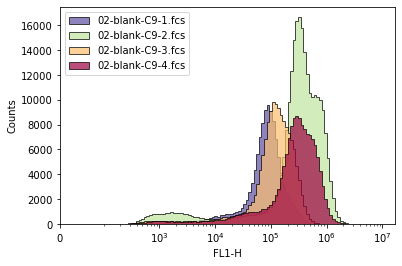

In [ ]:
filenames = ['02-blank-C9-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


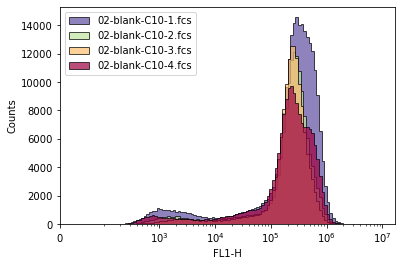

In [ ]:
filenames = ['02-blank-C10-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


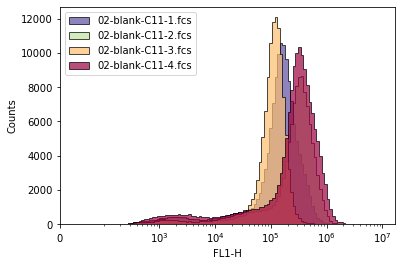

In [ ]:
filenames = ['02-blank-C11-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


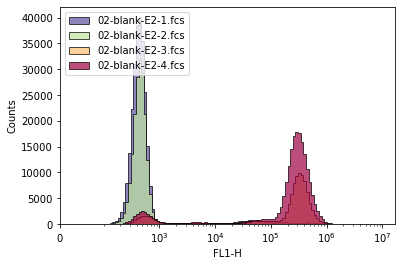

In [ ]:
filenames = ['02-blank-E2-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


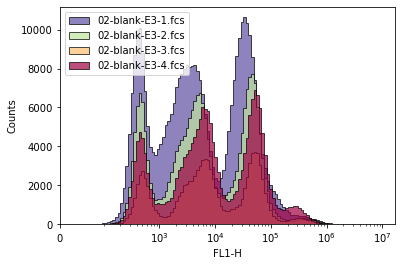

In [ ]:
filenames = ['02-blank-E3-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


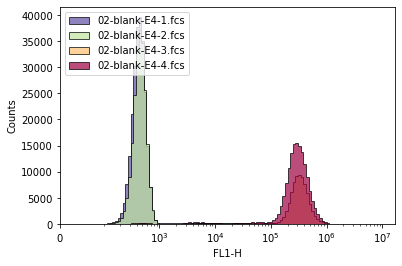

In [ ]:
filenames = ['02-blank-E4-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


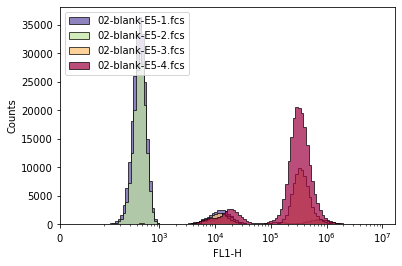

In [ ]:
filenames = ['02-blank-E5-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


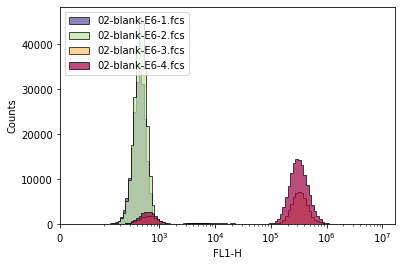

In [ ]:
filenames = ['02-blank-E6-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


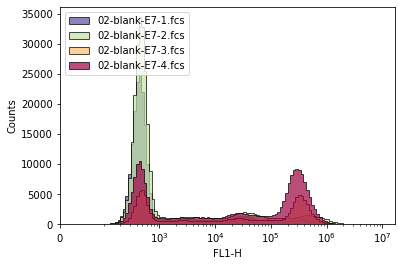

In [ ]:
filenames = ['02-blank-E7-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


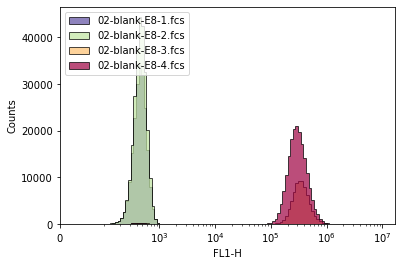

In [ ]:
filenames = ['02-blank-E8-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


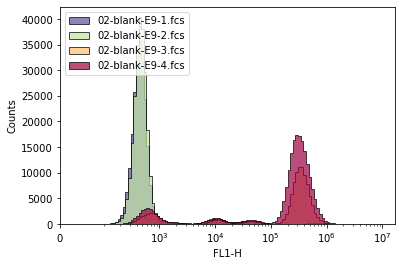

In [ ]:
filenames = ['02-blank-E9-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


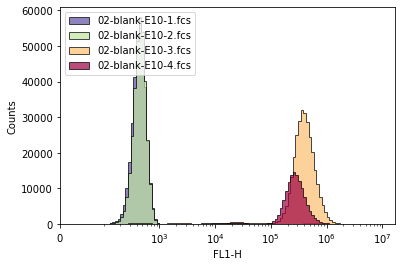

In [ ]:
filenames = ['02-blank-E10-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


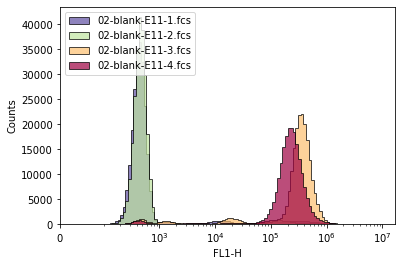

In [ ]:
filenames = ['02-blank-E11-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


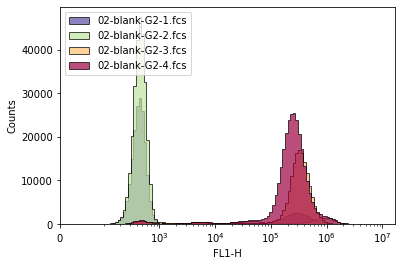

In [ ]:
filenames = ['02-blank-G2-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


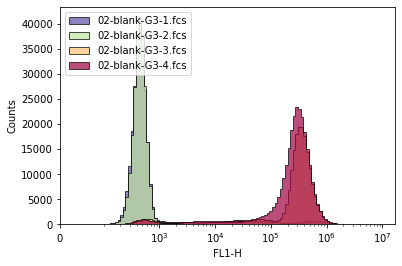

In [ ]:
filenames = ['02-blank-G3-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


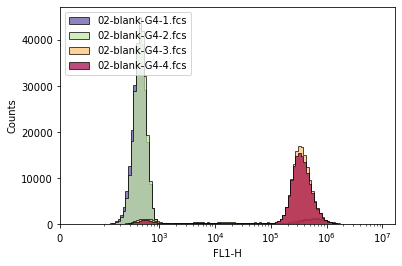

In [ ]:
filenames = ['02-blank-G4-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


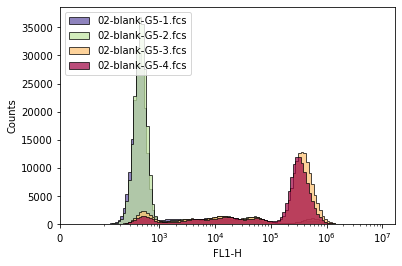

In [ ]:
filenames = ['02-blank-G5-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


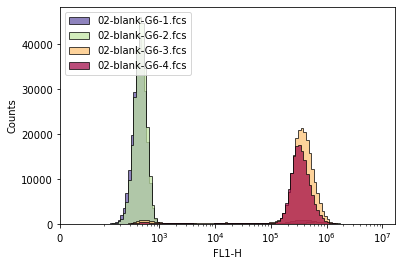

In [ ]:
filenames = ['02-blank-G6-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


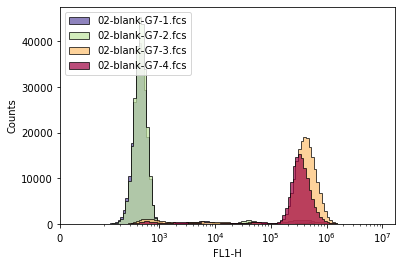

In [ ]:
filenames = ['02-blank-G7-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


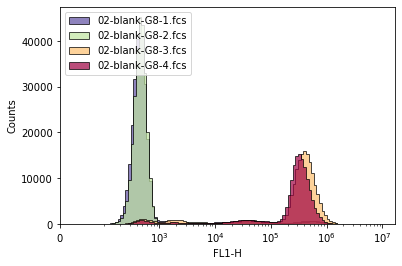

In [ ]:
filenames = ['02-blank-G8-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


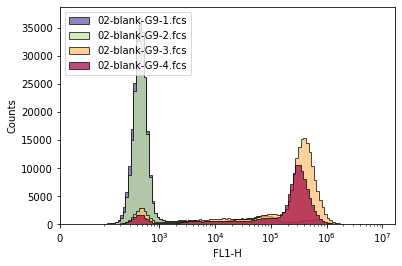

In [ ]:
filenames = ['02-blank-G9-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


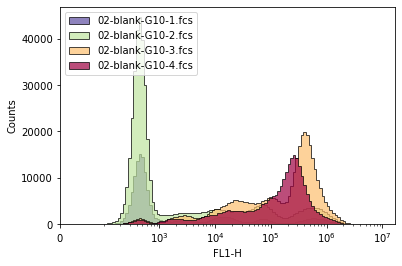

In [ ]:
filenames = ['02-blank-G10-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


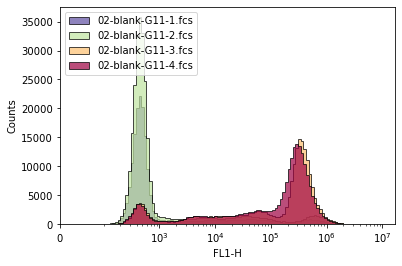

In [ ]:
filenames = ['02-blank-G11-{:01d}.fcs'.format(i + 1) for i in range(4)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()


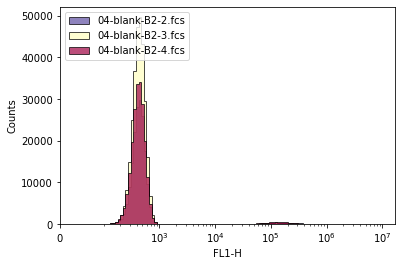

In [ ]:
filenames = ['04-blank-B2-{:01d}.fcs'.format(i + 2) for i in range(3)]
d = [FlowCal.io.FCSData(filename) for filename in filenames]
d = [FlowCal.transform.to_rfi(di) for di in d]
FlowCal.plot.hist1d(d, channel='FL1-H', alpha=0.7, bins=128)
plt.legend(filenames, loc='upper left')
plt.show()
